<a href="https://colab.research.google.com/github/magotronico/DataAnalysis_and_AI/blob/main/dmx_challenge/dmx_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DmX Challenge: Company Policies to Maximize Branch Income
#### **Overview**

This notebook is designed to analyze the efficiency of each branch and its associated salesmen using the data provided by DmX. The primary goal of this analysis is to extract valuable insights that can help in assessing and improving operational performance across different branches.

#### **Process**

This project involves implementing an **ETL (Extract, Transform, Load) pipeline**. The pipeline is responsible for:

1.   **Extracting** the raw data from CSV files.
2.   **Transforming** the data into a structured and insightful format.
3.   **Loading** the processed data back into CSV files for further analysis or reporting.

By the end of this notebook, you'll have a clear understanding of how each branch and salesman perform, allowing for data-driven decision-making to enhance overall efficiency.



---
Instituto Tecnológico y de Estudios Superiores de Monterrey

Analítica de datos y herramientas de inteligencia artificial TI3001C.103

Profesor: Enrique Ricardo García Hernández

Equipo 2:
*   Dilan González Castañeda A00831905
*   List item



## Extract
DmX provided a .xlsx with relevant information as:


*   List item
*   List item


The structure in the file does not provide an easy way to use it with python and pandas, so we had to convert the .xsls to csv.

In [69]:
!pip install unidecode
!pip install matplotlib

In [70]:
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt

file_name = '/content/Indicadores_reto_AD24.csv'

In [71]:
df = pd.read_csv(file_name, encoding='utf-8')
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10322 entries, 0 to 10321
Columns: 181 entries, Región to Quitas Actual
dtypes: float64(167), object(14)
memory usage: 14.3+ MB


## Transform
Before hand, in excel we have to **pre-process** the information to declare all money and porcentage **values as float** (2 and 4 decimals). That would be the only change done manually so we can save the .xlsx as .csv and now start using this pipeline.


Once the data is loaded into the environment, we need to perform several transformations to ensure it is structured and easily manageable:

- **Drop Empty Column**: Remove any column that contains no data to clean up the dataset.

- **Split Región Column**: The `Región` column was combined for Excel interface efficiency. We will split it into three separate columns: `Region`, `Division`, and `Sucursal`.

- **Merge Branches**: Consolidate branch names by merging those with " BIS" into their primary counterparts. For example, `Plaza Rivera BIS` will be merged into `Plaza Rivera`.

- **Normalize Text**: Remove the character "ñ" and any accent marks from all location, division, and region names to standardize the data.

### Drop empy column, normalize text

In [72]:
df.drop(columns=['Unnamed: 2'], inplace=True)
print([col for col in df.columns])
df.rename(columns={'Región': 'sucursal'}, inplace=True)
df['sucursal'] = df['sucursal'].apply(unidecode)
df.head()

['Región', 'Vendedor', 'Saldo Insoluto T-12', 'Saldo Insoluto T-11', 'Saldo Insoluto T-10', 'Saldo Insoluto T-09', 'Saldo Insoluto T-08', 'Saldo Insoluto T-07', 'Saldo Insoluto T-06', 'Saldo Insoluto T-05', 'Saldo Insoluto T-04', 'Saldo Insoluto T-03', 'Saldo Insoluto T-02', 'Saldo Insoluto T-1', 'Saldo Insoluto Actual', 'Saldo Insoluto Vencido T-12', 'Saldo Insoluto Vencido T-11', 'Saldo Insoluto Vencido T-10', 'Saldo Insoluto Vencido T-09', 'Saldo Insoluto Vencido T-08', 'Saldo Insoluto Vencido T-07', 'Saldo Insoluto Vencido T-06', 'Saldo Insoluto Vencido T-05', 'Saldo Insoluto Vencido T-04', 'Saldo Insoluto Vencido T-03', 'Saldo Insoluto Vencido T-02', 'Saldo Insoluto Vencido T-01', 'Saldo Insoluto Vencido Actual', 'Saldo Insoluto \n30-89  T-12', 'Saldo Insoluto \n30-89  T-11', 'Saldo Insoluto \n30-89  T-10', 'Saldo Insoluto \n30-89  T-09', 'Saldo Insoluto \n30-89  T-08', 'Saldo Insoluto \n30-89  T-07', 'Saldo Insoluto \n30-89  T-06', 'Saldo Insoluto \n30-89  T-05', 'Saldo Insoluto 

,sucursal,Vendedor,Saldo Insoluto T-12,Saldo Insoluto T-11,Saldo Insoluto T-10,Saldo Insoluto T-09,Saldo Insoluto T-08,Saldo Insoluto T-07,Saldo Insoluto T-06,Saldo Insoluto T-05,...,Quitas T-09,Quitas T-08,Quitas T-07,Quitas T-06,Quitas T-05,Quitas T-04,Quitas T-03,Quitas T-02,Quitas T-01,Quitas Actual
0,Centro Metropolis,MAA_6289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1488.00,0.02
1,Centro Metropolis,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1488.00,0.02
2,Conexion Magna,MAG_7191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02,1913.46,-0.01
3,Conexion Magna,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.02,1913.46,-0.01
4,Enlace Regio,ALM_0607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794.28,NaN,NaN


### Normalize columns

**Explanation:**
* **Lowercase and Underscores:** The lower() method converts all characters to lowercase, and replace() is used to replace spaces and special characters with underscores.

* **Acronyms:** Common phrases are replaced with shorter acronyms (e.g., saldo_insoluto becomes si, vencido becomes vnc, etc.).

* **Time Series Handling:** T-12, T-11, etc., are replaced with m_12, m_11, and so on, to indicate months.

---
**Example Column Renaming:**
* 'Región' → 'region'
* 'Saldo Insoluto T-12' → 'si_m_12'
* 'Saldo Insoluto Actual' → 'si_act'
* 'Pago Anticipado T-12' → 'pa_m_12'
* 'Castigos T-12' → 'cst_m_12'

In [73]:
# Rename columns

# Define a function to rename columns
def rename_column(col):
    # Replace spaces and special characters
    col = col.lower().replace(' ', '_').replace('\n', '').replace('-', '_').replace('%', 'pct')

    # Create acronyms for common terms
    col = col.replace('saldo_insoluto', 'si')
    col = col.replace('vencido', 'vnc')
    col = col.replace('actual', 'act')
    col = col.replace('pago_anticipado', 'pa')
    col = col.replace('capital_liquidado', 'cl')
    col = col.replace('capital_dispersado', 'cd')
    col = col.replace('quitas', 'qts')
    col = col.replace('castigos', 'cst')

    # Handle time series (T-12, T-11,..., T-01, Actual)
    if '_t_' in col:
        col = col.replace('_t_', '_m_')

    col = col.replace('__', '_')
    return col


# Apply renaming function to all columns
df.columns = [rename_column(col) for col in df.columns]

# Print new column names
print([col for col in df.columns])

['sucursal', 'vendedor', 'si_m_12', 'si_m_11', 'si_m_10', 'si_m_09', 'si_m_08', 'si_m_07', 'si_m_06', 'si_m_05', 'si_m_04', 'si_m_03', 'si_m_02', 'si_m_1', 'si_act', 'si_vnc_m_12', 'si_vnc_m_11', 'si_vnc_m_10', 'si_vnc_m_09', 'si_vnc_m_08', 'si_vnc_m_07', 'si_vnc_m_06', 'si_vnc_m_05', 'si_vnc_m_04', 'si_vnc_m_03', 'si_vnc_m_02', 'si_vnc_m_01', 'si_vnc_act', 'si_30_89_m_12', 'si_30_89_m_11', 'si_30_89_m_10', 'si_30_89_m_09', 'si_30_89_m_08', 'si_30_89_m_07', 'si_30_89_m_06', 'si_30_89_m_05', 'si_30_89_m_04', 'si_30_89_m_03', 'si_30_89_m_02', 'si_30_89_m_01', 'si_30_89_act', 'saldo_60_en_6_m_12', 'saldo_60_en_6_m_11', 'saldo_60_en_6_m_10', 'saldo_60_en_6_m_09', 'saldo_60_en_6_m_08', 'saldo_60_en_6_m_07', 'saldo_60_en_6_m_06', 'saldo_60_en_6_m_05', 'saldo_60_en_6_m_04', 'saldo_60_en_6_m_03', 'saldo_60_en_6_m_02', 'saldo_60_en_6_m_01', 'saldo_60_en_6_act', 'cst_ago_22', 'cst_sep_22', 'cst_oct_22', 'cst_nov_22', 'cst_dic_22', 'cst_ene_23', 'cst_feb_23', 'cst_mar_23', 'cst_abr_23', 'cst_may_

### Aux to split region column

In [74]:
regions = ["Brokers", "Nucleo Uno", "Nucleo Dos", "Red Nortena", "Red Noroeste", "Occidente Conexion", "Red Sureste"]

divisions = [
    "Division. Red Mexiquense", "Conexion Naucalpan", "Zona Sur Central",
    "Zona Oriente Valle", "Zona Norte Valle", "Division. Distrito Central",
    "Nucleo Avance", "Zona Nucleo CDMX", "Zona Oriente Conexion",
    "Zona Cordillera Puebla", "Zona Bahia Veracruz", "Division Red Nortena",
    "Zona Sierra Norte", "Zona Red frontera este", "Zona Bahia del Sol",
    "Division Sierra del Desierto", "Zona Costa del Pacifico",
    "Zona Valle Dorado", "Zona Desierto del Sol", "Conexion GDL",
    "Zona Corazon de la Sierra", "Zona Valles Centrales", "Zona Tierra de lagos", "Zona Cumbres del Pacifico", "Zona Valles del Pacifico", "Zona Selva Alta", "Zona Sierra Escondida", "Zona Riviera del Caribe"
]

branches = [
    "Centro Metropolis", "Conexion Magna", "Enlace Regio", "Puerto Magna",
    "Ciudad Piramide", "Valle Verde", "Rio Blanco", "Colina del Sol",
    "Colina del Sol BIS", "Parque Jurica", "Colina Plateada", "Altos de Queretaro", "Sol y Campo", "Satélite 1", "Satélite 2", "Satélite 3", "Bahia Dorada", "Costa Marquesa", "Bahia Dorada BIS", "Alto de Chilpan", "Cuautla Vista", "Jardines del Valle", "Llanos de Igualdad", "Parque Jojutla",
    "Valle Chalco", "Montana Azul", "Reyes Paz A", "Reyes Paz B",
    "Bosques Neza", "Cumbre Neza", "Cumbre Neza BIS", "Riberas Texcoco",
    "Pinar del Valle", "Cielos de Metepec", "Lomas de Naucalpan",
    "Puente de Tlalne", "Puente de Tlalne II", "Valles Toluca",
    "Cumbre Toluca", "Bosques Tultitlan", "Jardin Aragon A",
    "Pilares del Norte", "Pilares del Norte BIS", "Residencia A",
    "Residencia B", "Colinas GAM", "Plaza Central", "Los Arcos",
    "Los Arcos BIS", "Campo Zaragoza", "Lomas Zaragoza", "Campo Zaragoza BIS",
    "Avance 1", "Avance 2", "Avance 3", "Avance 4", "Parque Obregon",
    "Centro Viejo", "Mirador Tlalpan A", "Mirador Tlalpan A BIS",
    "Mirador Tlalpan B", "Lagunas de Xochimilco", "Plaza Zapata",
    "Robledal A", "Robledal B", "Campo Florido A", "Campo Florido B",
    "Campo Florido C", "Campo Florido D", "Riberas del Sur",
    "Sierra Cordobesa", "Valles de Orizaba", "Alturas de Puebla",
    "Jardines Manuel", "Lomas Santiago", "Alturas de Puebla BIS",
    "Llanos Tehuacan", "Bosques Tlaxcala", "Colinas Miron",
    "Valle Rica", "Puerto Bravo", "Puerta Cuauhtemoc", "Puerto Bravo BIS",
    "Cumbres Xalapa", "Lomas Xalapa", "Paso del Norte", "Rio Bravo",
    "Aceros del Norte", "Aceros del Norte BIS", "Paso Nuevo",
    "Paso Nuevo BIS", "Piedras Altas", "Piedras Altas BIS", "Valles del Norte",
    "Laguna Norte", "Sabinas Sierra", "Campos Saltillo", "Centro Saltillo",
    "Centro Saltillo BIS", "Campos Saltillo BIS", "Lomas de Alamos",
    "Lomas de Alamos BIS", "Valle Apodaca", "Valle Apodaca BIS",
    "Puente Lincoln", "Cumbres Regias", "Centro Regio", "Bulevar Regio",
    "San Nicolas Valle", "San Nicolas Valle BIS", "Sierra Santa",
    "Bosque Verde", "Palacio del Norte", "Palacio del Norte BIS",
    "Valle de Guadalupe", "Parque Madero", "Parque Madero BIS",
    "Expo Regia", "Desierto Norte", "Desierto Bravo", "Rio Revolucion",
    "Desierto Norte BIS", "Valle Real", "Victoria Alta", "Victoria Alta BIS",
    "Bahia Aeropuerto", "Plaza Tampico", "Colinas Tampico",
    "Colinas Tampico BIS", "Rio Madero", "Sierra Chihuahua",
    "Campus Sierra", "Victoria Sierra", "Victoria Sierra BIS",
    "Plaza Cuauhtemoc", "Juarez Norte", "Jardines del Norte",
    "Americas Plaza", "Americas Plaza BIS", "Patio Grande",
    "Colinas Jilotepec", "Parral Viejo", "Bahia Azul", "Bahia Azul BIS",
    "Plaza Pacifico", "Plaza Pacifico BIS", "Cabo Fuerte", "Valle Mexicali",
    "Norte Mexicali", "Valle Mexicali BIS", "Frontera Oeste",
    "Frontera Bravo", "Frontera Bravo BIS", "Valles de Culiacan",
    "Culiacan Norte", "Valles de Culiacan BIS", "Sierra Durango",
    "Durango Norte", "Valle del Rio", "Plaza Mochis", "Plaza Mochis BIS",
    "Norte Dorado", "Obregon Central", "Obregon Norte", "Obregon Central BIS",
    "Sierra Hermosillo", "Hermosillo Norte", "Sierra Hermosillo BIS",
    "Valle de Navojoa", "Frontera Nogales", "Guadalajara Uno",
    "Guadalajara Dos", "Guadalajara Tres", "Aguas Central",
    "Aguas Norte", "Aguas Central BIS", "Sierra Colima", "Rio Fresnillo",
    "Bahia Manzanillo", "San Luis Norte", "San Luis Alturas",
    "Cumbres Zacatecas", "Plaza Celaya", "Hidalgo Valle",
    "Jardines Irapuato", "Jardines Irapuato BIS", "Canadas Leon",
    "Norte Leon", "Canadas Leon BIS", "Valle Piedad", "Bahia Lazaro",
    "Colinas Morelia", "Morelia Norte", "Morelia Norte BIS",
    "Camelinas Plaza", "Jardines Uruapan", "Valle Zamora",
    "Valle Zamora BIS", "Riviera Zihua", "Montes Zitacuaro",
    "GDL Central", "Norte GDL", "Riviera Vallarta", "Riviera Vallarta BIS",
    "Valle Tepic", "Norte Tepic", "Jardines Tlaque", "Montes Tonala",
    "Guzman Valle", "IMSS GDL", "Oblatos Plaza", "Las Aguilas",
    "Zapopan Plaza", "Rio Coatzacoalcos", "Valle Comitan",
    "Selva Tapachula", "Tuxtla Norte", "Tuxtla Central", "Villa Central",
    "Villa Norte", "Villa Norte BIS", "Villa Alturas", "Sierra Oaxaca",
    "Riviera Escondida", "Bahia Cruz", "Bahia Cruz BIS", "Rio Tuxtepec",
    "Bahia Campeche", "Riviera Cancun", "Bahia Chetumal",
    "Isla del Carmen", "Sierra Merida", "Merida Norte", "Alturas Merida",
    "Sierra Merida BIS", "Riviera Playa"
]

for branch in branches:
  if 'BIS' in branch:
    branches.remove(branch)

print(len(branches), len(divisions), len(regions))

196 28 7


In [75]:
loc_struct = {
    "Brokers": ["Centro Metropolis", "Conexion Magna", "Enlace Regio", "Puerto Magna"],
    "Nucleo Uno": {
        "Division. Red Mexiquense": ["Ciudad Piramide", "Valle Verde", "Rio Blanco", "Colina del Sol",
                                     "Colina del Sol BIS", "Parque Jurica", "Colina Plateada",
                                     "Altos de Queretaro", "Sol y Campo"],
        "Conexion Naucalpan": ["Satelite 1", "Satelite 2", "Satelite 3"],
        "Zona Sur Central": ["Bahia Dorada", "Costa Marquesa", "Bahia Dorada BIS", "Alto de Chilpan",
                             "Cuautla Vista", "Jardines del Valle", "Llanos de Igualdad", "Parque Jojutla"],
        "Zona Oriente Valle": ["Valle Chalco", "Montana Azul", "Reyes Paz A", "Reyes Paz B",
                               "Bosques Neza", "Cumbre Neza", "Cumbre Neza BIS", "Riberas Texcoco"],
        "Zona Norte Valle": ["Pinar del Valle", "Cielos de Metepec", "Lomas de Naucalpan",
                             "Puente de Tlalne", "Puente de Tlalne II", "Valles Toluca",
                             "Cumbre Toluca", "Bosques Tultitlan"]
    },
    "Nucleo Dos": {
        "Division. Distrito Central": ["Jardin Aragon A", "Pilares del Norte", "Pilares del Norte BIS",
                                       "Residencia A", "Residencia B", "Colinas GAM", "Plaza Central",
                                       "Los Arcos", "Los Arcos BIS", "Campo Zaragoza", "Lomas Zaragoza",
                                       "Campo Zaragoza BIS"],
        "Nucleo Avance": ["Avance 1", "Avance 2", "Avance 3", "Avance 4"],
        "Zona Nucleo CDMX": ["Parque Obregon", "Centro Viejo", "Mirador Tlalpan A", "Mirador Tlalpan A BIS",
                             "Mirador Tlalpan B", "Lagunas de Xochimilco", "Plaza Zapata"],
        "Zona Oriente Conexion": ["Robledal A", "Robledal B", "Campo Florido A",
                                  "Campo Florido B", "Campo Florido C", "Campo Florido D",
                                  "Riberas del Sur"],
        "Zona Cordillera Puebla": ["Sierra Cordobesa", "Valles de Orizaba", "Alturas de Puebla",
                                   "Jardines Manuel", "Lomas Santiago", "Alturas de Puebla BIS",
                                   "Llanos Tehuacan", "Bosques Tlaxcala"],
        "Zona Bahia Veracruz": ["Colinas Miron", "Valle Rica", "Puerto Bravo", "Puerta Cuauhtemoc", "Puerto Bravo BIS", "Cumbres Xalapa", "Lomas Xalapa"]
    },

    "Red Nortena": {
        "Division Red Nortena": ["Aceros del Norte", "Aceros del Norte BIS", "Paso Nuevo", "Paso Nuevo BIS",
                                 "Piedras Altas", "Piedras Altas BIS", "Valles del Norte",
                                 "Laguna Norte", "Sabinas Sierra", "Campos Saltillo",
                                 "Centro Saltillo", "Centro Saltillo BIS", "Campos Saltillo BIS", "Rio Bravo", "Paso del Norte"],

        "Zona Sierra Norte": ["Lomas de Alamos", "Lomas de alamos BIS", "Valle Apodaca", "Valle Apodaca BIS", "Puente Lincoln", "Cumbres Regias", "Centro Regio",
                              "Bulevar Regio", "San Nicolas Valle", "San Nicolas Valles BIS", "Sierra Santa"],
        "Zona Red frontera este": ["Bosque Verde", "Palacio del Norte", "Palacio del Norte BIS", "Valle de Guadalupe", "Parque Madero", "Parque Madero BIS", "Expo Regia",
                                   "Desierto Norte", "Desierto Bravo", "Rio Revolucion", "Desierto Norte BIS"],
        "Zona Bahia del Sol": ["Valle Real", "Victoria Alta", "Victoria Alta BIS", "Bahia Aeropuerto",
                               "Plaza Tampico", "Colinas Tampico", "Colinas Tampico BIS", "Rio Madero"]
    },

    "Red Noroeste": {
        "Zona Desierto del Sol": ["Obregon Central", "Obregon Norte", "Obregon Central BIS",
                                  "Sierra Hermosillo", "Hermosillo Norte", "Sierra Hermosillo BIS", "Valle de Navojoa",
                                  "Frontera Nogales"],
        "Zona Valle Dorado": ["Valles de Culiacan", "Culiacan Norte", "Valles de Culiacan BIS", "Sierra Durango",
                              "Durango Norte", "Valle del Rio", "Plaza Mochis", "Plaza Mochis BIS", "Bahia Dorada", "Norte Dorado"],
        "Zona Costa del Pacifico": ["Bahia Azul", "Bahia Azul BIS", "Plaza Pacifico", "Plaza Pacifico BIS",
                                    "Cabo Fuerte", "Valle Mexicali", "Norte Mexicali", "Valle Mexicali BIS", "Frontera Oeste",
                                    "Frontera Bravo", "Frontera Bravo BIS"],
        "Division Sierra del Desierto": ["Sierra Chihuahua", "Campus Sierra", "Victoria Sierra",
                                         "Victoria Sierra BIS", "Plaza Cuauhtemoc", "Juarez Norte", "Jardines del Norte", "Americas Plaza",
                                         "Americas Plaza BIS", "Patio Grande", "Colinas Jilotepec", "Parral Viejo"]
    },

    "Occidente Conexion": {
        "Conexion GDL": ["Guadalajara Uno", "Guadalajara Dos", "Guadalajara Tres"],
        "Zona Corazon de la Sierra": ["Aguas Central", "Aguas Norte", "Aguas Central BIS", "Sierra Colima",
                                      "Rio Fresnillo", "Bahia Manzanillo", "San Luis Norte", "San Luis Alturas", "Cumbres Zacatecas"],
        "Zona Valles Centrales": ["Plaza Celaya", "Hidalgo Valle", "Jardines Irapuato", "Jardines Irapuato BIS",
                                  "Canadas Leon", "Norte Leon", "Canadas Leon BIS"],
        "Zona Tierra de lagos": ["Valle Piedad", "Bahia Lazaro", "Colinas Morelia", "Morelia Norte", "Morelia Norte BIS",
                                 "Camelinas Plaza", "Jardines Uruapan", "Valle Zamora",
                                 "Valle Zamora BIS", "Riviera Zihua", "Montes Zitacuaro"],
        "Zona Cumbres del Pacifico": ["GDL Central", "Norte GDL", "Riviera Vallarta", "Riviera Vallarta BIS",
                                      "Valle Tepic", "Norte Tepic", "Jardines Tlaque", "Montes Tonala"],
        "Zona Valles del Pacifico": ["Guzman Valle", "IMSS GDL", "Oblatos Plaza",
                                     "Las Aguilas", "Zapopan Plaza"]
    },
    "Red Sureste": {
        "Zona Selva Alta": ["Rio Coatzacoalcos", "Valle Comitan", "Selva Tapachula", "Tuxtla Norte", "Tuxtla Central",
                            "Villa Central", "Villa Norte", "Villa Norte BIS", "Villa Alturas"],
        "Zona Sierra Escondida": ["Sierra Oaxaca", "Riviera Escondida", "Bahia Cruz", "Bahia Cruz BIS", "Rio Tuxtepec"],
        "Zona Riviera del Caribe": ["Bahia Campeche", "Riviera Cancun", "Bahia Chetumal", "Isla del Carmen",
                                   "Sierra Merida", "Merida Norte", "Alturas Merida", "Sierra Merida BIS",
                                   "Riviera Playa"],
    },
}


### Split sucursal column, merge branches

In [76]:
# Step 1: Leave min unit (vendedores)
filtered_df = df[df['sucursal'] != 'Total']
filtered_df = filtered_df[~filtered_df['sucursal'].isin(regions)]
filtered_df = filtered_df[~filtered_df['sucursal'].isin(divisions)]

# Step 2: Combine " BIS" with corresponding non-BIS values
filtered_df['sucursal'] = filtered_df['sucursal'].apply(lambda x: x.replace(' BIS', ''))

# Step 3: Delete row with region but without vendor
# is a 'Vendedor' to check for non-null values
filtered_df = filtered_df[filtered_df['vendedor'].notna()]

In [77]:
# Step 4: Add region and division columns
def extract_region_division(location, loc_struct):
  """Extracts region and division from loc_struct based on location.

  Args:
  location: The location name.
  locsStruct: The nested dictionary containing location information.

  Returns:
  A tuple containing region and division, or None if not found.
  """

  for region, divisions in loc_struct.items():
    if isinstance(divisions, dict):
      for division, locations_list in divisions.items():
        if location in locations_list:
          return region, division
    elif location in divisions:
      return region, None

  return None, None

# Apply the function to create new columns
filtered_df['region'], filtered_df['division'] = zip(*filtered_df['sucursal'].apply(extract_region_division, args=(loc_struct,)))
# Insert 'region' as the first column
filtered_df.insert(0, 'region', filtered_df.pop('region'))
# Insert 'division' as the second column
filtered_df.insert(1, 'division', filtered_df.pop('division'))

In [78]:
x, y = extract_region_division('Riviera Playa', loc_struct)
print(x, y)
print(loc_struct["Red Sureste"]['Zona Selva Alta'][2])

Red Sureste Zona Riviera del Caribe
Selva Tapachula


In [79]:
# Print the result
print(filtered_df.shape[0])  # Number of rows
filtered_df.to_csv('clean_db.csv', index=False)
# filtered_df.sample(6)

10048


### Compute new indicators
The reason for this is to have some stadistics to

Saber la terminologia

Explorar los datos, tamaño de sucursales

Distribucion que siguen las variables con boxplot para medias, medianas, colas bajas o altas

Limpieza para eliminar outliers

Que tanto se alejan los valores de las mediana, ella quitaria sucursales muy chiquitas

Hacer clasificacion de las sucursales

Ver como afecta cada variable en esa clasificacion

Eliminar tal vez algun mes, eliminar 10% de colas bajas para sacarlos del algoritmo pero agregarlos a una clasificacion. Eliminar los vendedores con todo en ceros.

Darle mas sentido a los ultimos 6 meses antes que al año, darle mas peso a lo mas reciente que a lo viejo (proporcionalidad). Darle mas peso a mora 30-89 que a un imora porque si nos puede salvar uno y el otro ya no

El desempeño debe ser la suma ponderada de icv, imora y mora 30-89, con un peso mayor a manor de mora, icv, imora. Deben de haber 5 grupos, ya sea por rangos.

Este domingo entregar posibles

In [88]:
# Group by 'sucursal' and count the number of 'vendedor' for each
sucursal_vendor_count = filtered_df.groupby('sucursal')['vendedor'].count()

# Filter for sucursals with less than 30 vendors
filtered_sucursals = sucursal_vendor_count[sucursal_vendor_count < 30]

# Sort the results in ascending order
sorted_sucursals = filtered_sucursals.sort_values()

# Convert to a list
sucursal_list = sorted_sucursals.index.tolist()

# Print the result
print(f"Total sucursales: {filtered_df['sucursal'].nunique()}")
print(f"Sucursales with less than 30 vendors ({len(sucursal_list)}):")
for sucursal in sucursal_list:
    print(f"{sucursal}: {sucursal_vendor_count[sucursal]} vendors")
print(f"Quanty of vendors in sucursal with less than 30 vendors: {len(filtered_df[filtered_df['sucursal'].isin(sucursal_list)])}")

Total sucursales: 195
Sucursales with less than 30 vendors (48):
Conexion Magna: 1 vendors
Centro Metropolis: 1 vendors
Guadalajara Tres: 2 vendors
Puerto Magna: 2 vendors
Enlace Regio: 3 vendors
Satelite 1: 4 vendors
Guadalajara Uno: 5 vendors
Guadalajara Dos: 6 vendors
Riberas Texcoco: 6 vendors
Satelite 2: 7 vendors
Satelite 3: 7 vendors
Norte Dorado: 8 vendors
Campo Florido C: 8 vendors
Avance 4: 9 vendors
Avance 2: 9 vendors
Colinas GAM: 10 vendors
Bosques Neza: 10 vendors
Costa Marquesa: 12 vendors
Patio Grande: 13 vendors
Alturas Merida: 13 vendors
Villa Alturas: 13 vendors
Centro Viejo: 16 vendors
Campo Florido D: 16 vendors
Avance 3: 16 vendors
Riberas del Sur: 17 vendors
Colinas Jilotepec: 18 vendors
Parque Jurica: 18 vendors
Campo Florido B: 18 vendors
Cumbre Toluca: 19 vendors
Valle Piedad: 19 vendors
Avance 1: 19 vendors
Hidalgo Valle: 19 vendors
Bulevar Regio: 20 vendors
Guzman Valle: 20 vendors
Bosque Verde: 21 vendors
Sol y Campo: 21 vendors
Valle Tepic: 21 vendors
Bosq

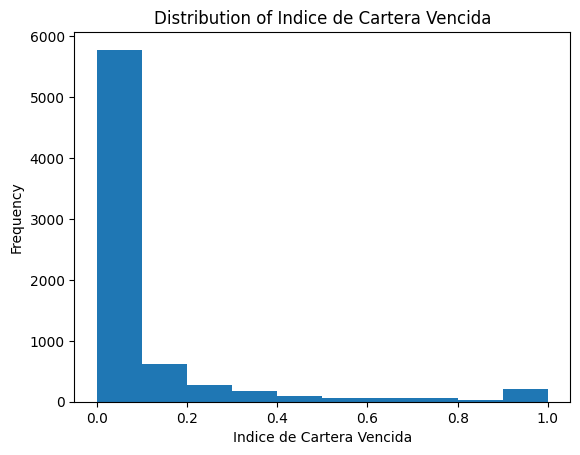

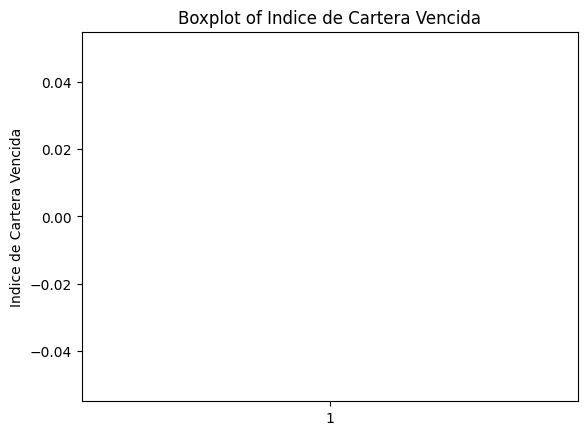

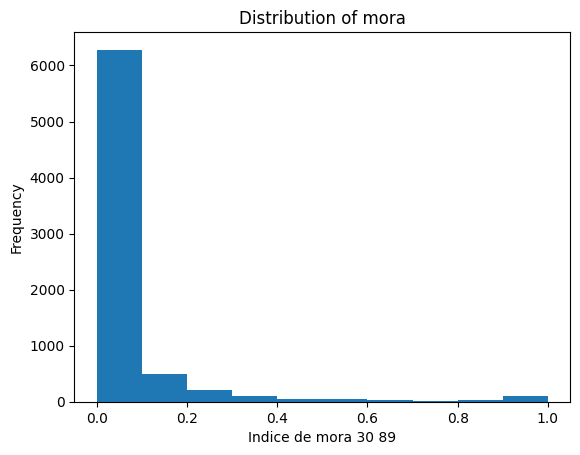

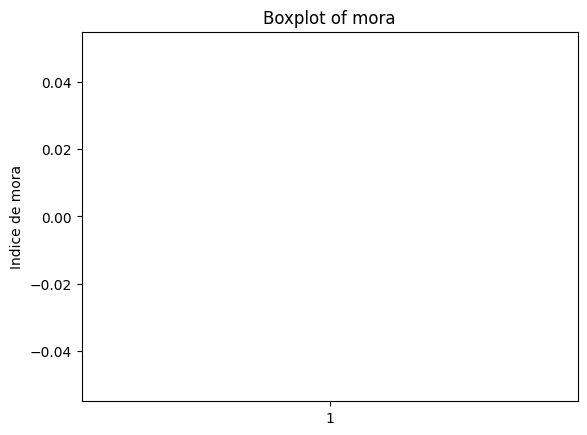

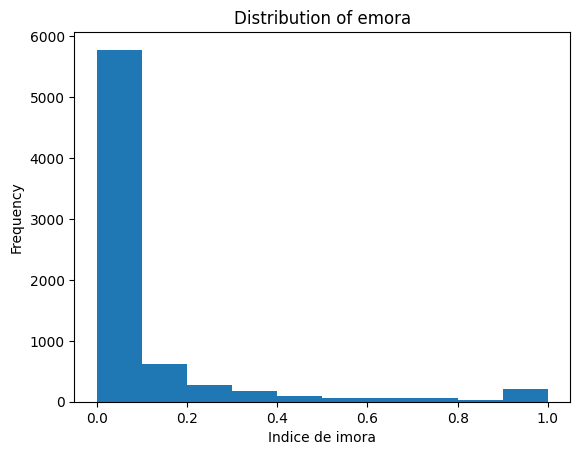

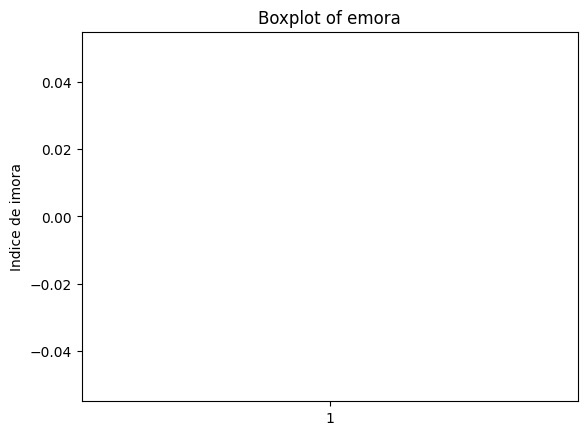

In [81]:
"""
Create a dict for each indicator which is going to store the values per cycle and per vendedor
"""


# Calculate 'Indice de Cartera Vencida' (icv)
filtered_df['icv'] = filtered_df['si_vnc_act'] / filtered_df['si_act']

# Calculate 'Morosidad 30-89 dias'
filtered_df['mora_30_89'] =  filtered_df['si_30_89_act'] / filtered_df['si_act']

# Calculate 'imora'
filtered_df['imora'] = filtered_df['si_vnc_act'] / filtered_df['si_act']

# Insert 'Cartera Vencida' as the fourth column
filtered_df.insert(4, 'icv', filtered_df.pop('icv'))
# Insert 'mora_30_89' as the fifth column
filtered_df.insert(5, 'mora_30_89', filtered_df.pop('mora_30_89'))
# Insert 'imora' as the sixth column
filtered_df.insert(6, 'imora', filtered_df.pop('imora'))

# # Check if columns exist
# print('Saldo Insoluto \n30-89  Actual' in filtered_df.columns)
# print('Saldo Insoluto Actual' in filtered_df.columns)
# print('Saldo Insoluto Vencido Actual' in filtered_df.columns)
# print([col for col in filtered_df.columns])

# Save the updated DataFrame to a new CSV file
filtered_df.to_csv('clean_db_with_venc_moras.csv', index=False)

# filtered_df.sample(3)

# Icv estogram
plt.hist(filtered_df['icv'])
plt.xlabel('Indice de Cartera Vencida')
plt.ylabel('Frequency')
plt.title('Distribution of Indice de Cartera Vencida')
plt.show()

#boxplot Cartera Vencida
plt.boxplot(filtered_df['mora_30_89'])
plt.ylabel('Indice de Cartera Vencida')
plt.title('Boxplot of Indice de Cartera Vencida')
plt.show()
# mora30 estogram
plt.hist(filtered_df['mora_30_89'])
plt.xlabel('Indice de mora 30 89')
plt.ylabel('Frequency')
plt.title('Distribution of mora')
plt.show()

#boxplot mora 30 89
plt.boxplot(filtered_df['mora_30_89'])
plt.ylabel('Indice de mora')
plt.title('Boxplot of mora')
plt.show()
# Imora estogram
plt.hist(filtered_df['imora'])
plt.xlabel('Indice de imora')
plt.ylabel('Frequency')
plt.title('Distribution of emora')
plt.show()

#boxplot of imora
plt.boxplot(filtered_df['imora'])
plt.ylabel('Indice de imora')
plt.title('Boxplot of emora')
plt.show()

In [82]:
# Obtener promedio, varianza por sucursal y agreugarlo en un nuevo data frame en donde las sucursales sean las filas y los indicadores las columnas
avr = filtered_df.groupby('sucursal').mean()
var = filtered_df.groupby('sucursal').var()
avr.to_csv('avr.csv', index=False)
var.to_csv('var.csv', index=False)  # Save the updated DataFrame to a new CSV file

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
na = filtered_df.isna().sum()
print(na)

test = filtered_df.copy(deep=True)

# Identify duplicates
duplicates = test[test.duplicated(subset=['vendedor'], keep=False)]

# Sort duplicates by 'vendedor' for better readability
duplicates_sorted = duplicates.sort_values('vendedor')

# Create a list of lists with 'vendedor' and 'sucursal' for each duplicate
duplicate_list = duplicates_sorted[['vendedor', 'sucursal']].values.tolist()

print("\nNumber of rows before removing duplicates:", len(test))
print("Number of duplicate rows:", len(duplicates))

# Remove duplicates
test.drop_duplicates(subset=['vendedor'], inplace=True)

print("Number of rows after removing duplicates:", len(test))

# Display the list of duplicates
print("\nList of duplicates (vendedor, sucursal):")
for item in duplicate_list:
    print(item)

# Return the list of duplicates
duplicate_list
